In [ ]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn import preprocessing
import seaborn as sns
import sklearn

import numpy as np
import pandas as pd

# KM 1 - Eksploracyjna analiza danych

In [ ]:
test = pd.read_csv("test.csv")
train = pd.read_csv('train.csv')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [ ]:
test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
for col in test.columns:
  print(col)

tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tGravityAcc-m

### Opis zmiennych
Zmienne przedstawiają wartości sygnałów rejestrowanych podczas ruchu osób badanych

Ze względu na pierwszą literę
- t- time-domain, parametry ze względu na czas
- f- frequency-domain, ze względu na częstotliwość

Opisywane parametry:
- BodyAcc - przyspieszenie ciała
- GravityAcc - przyspieszenie grwaitacyjne
- BodyAccJerk - zryw ciała (pochodna po przyspieszeniu)
- BodyGyro - przyspieszenie rotacyjne

Statystyki
- średnia
- odchylenie standardowe
- mad (median absolute deviation)
- min
- max
- IQR
- współczynnik R
- energia
- entropia

Poza tym:
- subject - osoba badana (1-3)
- Activity - rodzaj aktywności (etykieta, zmienna kategoryczna)

Łączymy ze sobą ramki train i test

In [ ]:
dane = pd.concat([test, train])

### Braki danych

In [ ]:
missing_values = dane.isna().sum().reset_index(name='NaN_Count')
missing_values[missing_values['NaN_Count'] > 0]

Empty DataFrame
Columns: [index, NaN_Count]
Index: []

In [ ]:
dane = dane.dropna()

In [ ]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10299 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.3+ MB


In [ ]:
def val_count(kolumna):
    print("koluma: " + kolumna)
    value_counts = dane[kolumna].value_counts()

    for value, count in value_counts.items():
        print(f"Wartość: {value}, Liczba wystąpień: {count}")
    print("")
    unique_count = dane[kolumna].nunique()
    print(f"roznych wartosci w kolumnie: {unique_count}")
    print("")

In [ ]:
def val_count1(kolumna):
    print("koluma: " + kolumna)
    value_counts = dane_vhs[kolumna].value_counts()

    for value, count in value_counts.items():
        print(f"Wartość: {value}, Liczba wystąpień: {count}")
    print("")
    unique_count = dane_vhs[kolumna].nunique()
    print(f"roznych wartosci w kolumnie: {unique_count}")
    print("")

Jako, że nasze dane sa tak dziwnie zbudowane to nie mamy innej możliwości sprawdzania jak modele klastrują dane niż patrzenie na ile klastry są zgodne z jakimś podziałem kolumny 'Activity' na grupy aktywności stworzone przez nas. W tym celu tworzymy 3 zbiory danych z różnymi podziałami kolumny 'Activity' na grupy:

*   dane - każda aktywność oddzielnie
*   dane_vhs - grupy aktywności to vertical (walking), horizontal (walking), stationary
*   dane_wsl - grupy aktywności to walking, stationary, laying





In [ ]:
activity_mapping = {
    'WALKING_UPSTAIRS': 0,
    'WALKING_DOWNSTAIRS': 1,
    'WALKING': 2,
    'STANDING': 3,
    'SITTING': 4,
    'LAYING': 5
}

dane_vhs = dane.copy()

dane['Activity'] = dane['Activity'].map(activity_mapping)

In [ ]:
activity_mapping2 = {
    'WALKING_UPSTAIRS': 0,
    'WALKING_DOWNSTAIRS': 0,
    'WALKING': 1,
    'STANDING': 2,
    'SITTING': 2,
    'LAYING': 2
}


dane_vhs['Activity'] = dane_vhs['Activity'].map(activity_mapping2)

In [ ]:

dane_vhs.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0         2  
1         2  
2         2  
3         2  
4         2  

[5 rows x 563 columns]

In [ ]:
dane_wsl = dane.copy()

activity_mapping3 = {
    0: 0,
    1: 0,
    2: 0,
    3: 1,
    4: 1,
    5: 2
}


dane_wsl['Activity'] = dane_wsl['Activity'].map(activity_mapping3)

In [ ]:
val_count('Activity')

koluma: Activity
Wartość: 5, Liczba wystąpień: 1944
Wartość: 3, Liczba wystąpień: 1906
Wartość: 4, Liczba wystąpień: 1777
Wartość: 2, Liczba wystąpień: 1722
Wartość: 0, Liczba wystąpień: 1544
Wartość: 1, Liczba wystąpień: 1406

roznych wartosci w kolumnie: 6



In [ ]:
val_count1('Activity')

koluma: Activity
Wartość: 2, Liczba wystąpień: 5627
Wartość: 0, Liczba wystąpień: 2950
Wartość: 1, Liczba wystąpień: 1722

roznych wartosci w kolumnie: 3



## Wykresy średniego przyspieszenia ciała i jego odchylenia standardowego

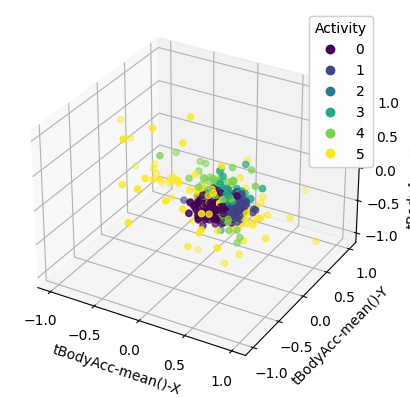

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(dane['tBodyAcc-mean()-X'], dane['tBodyAcc-mean()-Y'], dane['tBodyAcc-mean()-Z'], c = dane['Activity'])
legend = ax.legend(*scatter.legend_elements(), title="Activity")
ax.add_artist(legend)
ax.set_xlabel('tBodyAcc-mean()-X')
ax.set_ylabel('tBodyAcc-mean()-Y')
ax.set_zlabel('tBodyAcc-mean()-Z')

plt.show()

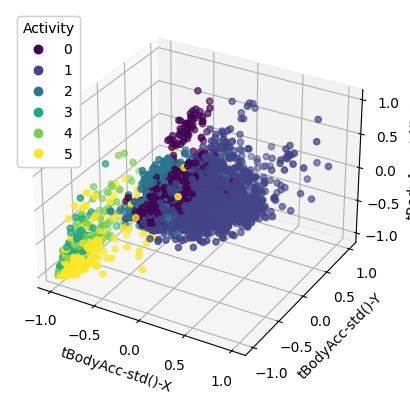

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(dane['tBodyAcc-std()-X'], dane['tBodyAcc-std()-Y'], dane['tBodyAcc-std()-Z'], c = dane['Activity'])
legend = ax.legend(*scatter.legend_elements(), title="Activity")
ax.add_artist(legend)
ax.set_xlabel('tBodyAcc-std()-X')
ax.set_ylabel('tBodyAcc-std()-Y')
ax.set_zlabel('tBodyAcc-std()-Z')

plt.show()

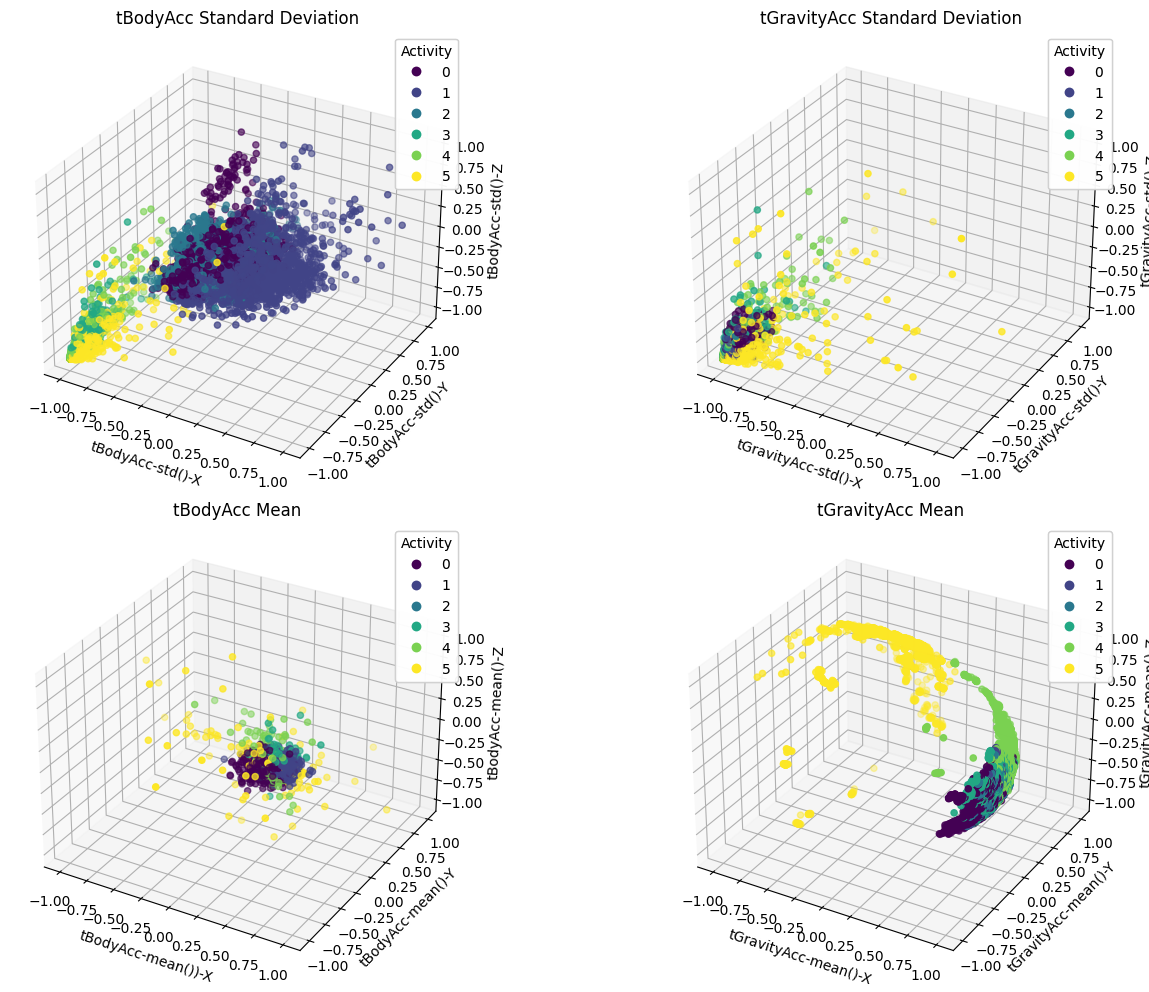

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221, projection='3d')
scatter1 = ax1.scatter(dane['tBodyAcc-std()-X'], dane['tBodyAcc-std()-Y'], dane['tBodyAcc-std()-Z'], c=dane['Activity'])
legend1 = ax1.legend(*scatter1.legend_elements(), title="Activity")
ax1.add_artist(legend1)
ax1.set_xlabel('tBodyAcc-std()-X')
ax1.set_ylabel('tBodyAcc-std()-Y')
ax1.set_zlabel('tBodyAcc-std()-Z')
ax1.set_title('tBodyAcc Standard Deviation')

ax2 = fig.add_subplot(222, projection='3d')
scatter2 = ax2.scatter(dane['tGravityAcc-std()-X'], dane['tGravityAcc-std()-Y'], dane['tGravityAcc-std()-Z'], c=dane['Activity'])
legend2 = ax2.legend(*scatter2.legend_elements(), title="Activity")
ax2.add_artist(legend2)
ax2.set_xlabel('tGravityAcc-std()-X')
ax2.set_ylabel('tGravityAcc-std()-Y')
ax2.set_zlabel('tGravityAcc-std()-Z')
ax2.set_title('tGravityAcc Standard Deviation')

ax3 = fig.add_subplot(223, projection='3d')
scatter3 = ax3.scatter(dane['tBodyAcc-mean()-X'], dane['tBodyAcc-mean()-Y'], dane['tBodyAcc-mean()-Z'], c=dane['Activity'])
legend3 = ax3.legend(*scatter3.legend_elements(), title="Activity")
ax3.add_artist(legend3)
ax3.set_xlabel('tBodyAcc-mean())-X')
ax3.set_ylabel('tBodyAcc-mean()-Y')
ax3.set_zlabel('tBodyAcc-mean()-Z')
ax3.set_title('tBodyAcc Mean')

ax4 = fig.add_subplot(224, projection='3d')
scatter4 = ax4.scatter(dane['tGravityAcc-mean()-X'], dane['tGravityAcc-mean()-Y'], dane['tGravityAcc-mean()-Z'], c=dane['Activity'])
legend4 = ax4.legend(*scatter4.legend_elements(), title="Activity")
ax4.add_artist(legend4)
ax4.set_xlabel('tGravityAcc-mean()-X')
ax4.set_ylabel('tGravityAcc-mean()-Y')
ax4.set_zlabel('tGravityAcc-mean()-Z')
ax4.set_title('tGravityAcc Mean')

plt.tight_layout()
plt.show()

Wykresy dla danych VHS

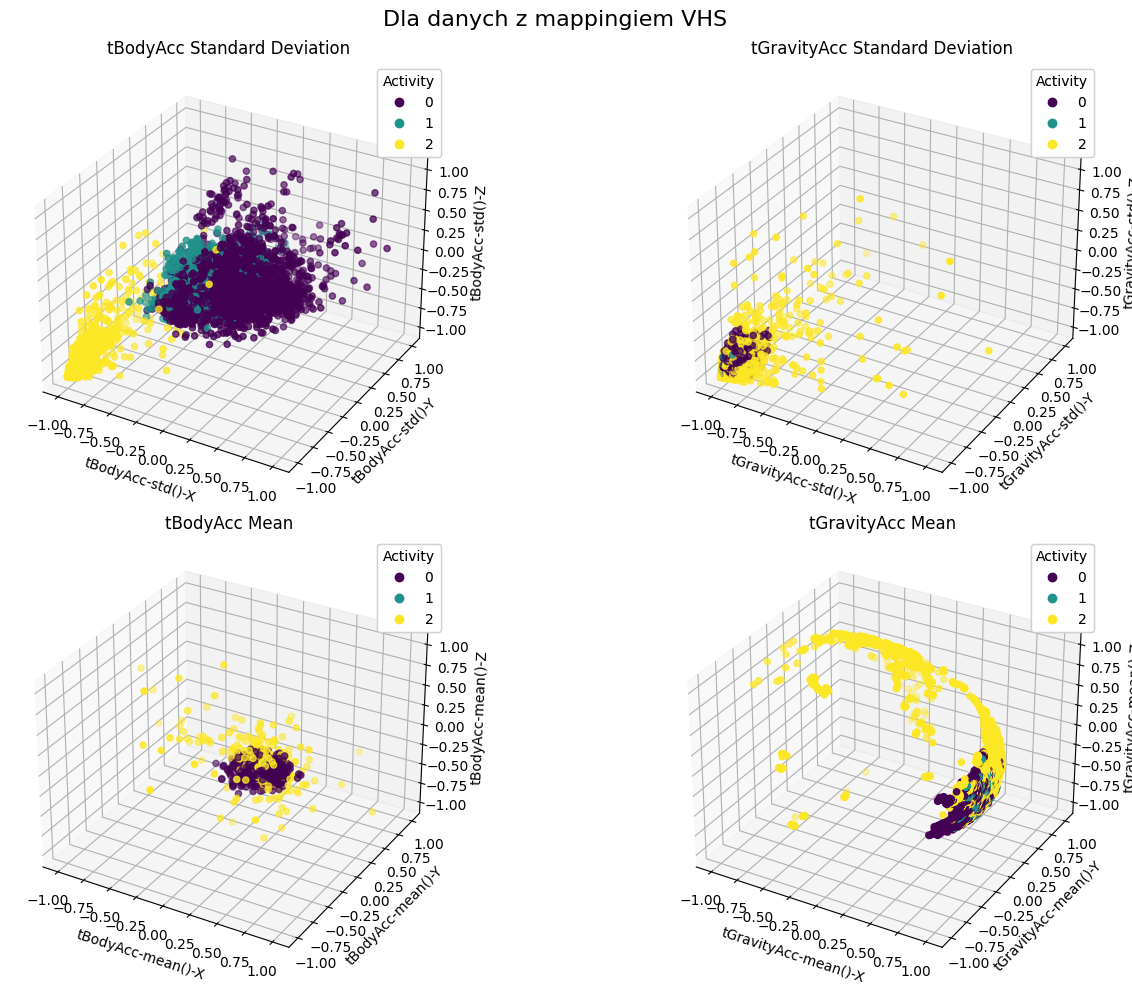

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221, projection='3d')
scatter1 = ax1.scatter(dane_vhs['tBodyAcc-std()-X'], dane_vhs['tBodyAcc-std()-Y'], dane_vhs['tBodyAcc-std()-Z'], c=dane_vhs['Activity'])
legend1 = ax1.legend(*scatter1.legend_elements(), title="Activity")
ax1.add_artist(legend1)
ax1.set_xlabel('tBodyAcc-std()-X')
ax1.set_ylabel('tBodyAcc-std()-Y')
ax1.set_zlabel('tBodyAcc-std()-Z')
ax1.set_title('tBodyAcc Standard Deviation')

ax2 = fig.add_subplot(222, projection='3d')
scatter2 = ax2.scatter(dane_vhs['tGravityAcc-std()-X'], dane_vhs['tGravityAcc-std()-Y'], dane_vhs['tGravityAcc-std()-Z'], c=dane_vhs['Activity'])
legend2 = ax2.legend(*scatter2.legend_elements(), title="Activity")
ax2.add_artist(legend2)
ax2.set_xlabel('tGravityAcc-std()-X')
ax2.set_ylabel('tGravityAcc-std()-Y')
ax2.set_zlabel('tGravityAcc-std()-Z')
ax2.set_title('tGravityAcc Standard Deviation')

ax3 = fig.add_subplot(223, projection='3d')
scatter3 = ax3.scatter(dane_vhs['tBodyAcc-mean()-X'], dane_vhs['tBodyAcc-mean()-Y'], dane_vhs['tBodyAcc-mean()-Z'], c=dane_vhs['Activity'])
legend3 = ax3.legend(*scatter3.legend_elements(), title="Activity")
ax3.add_artist(legend3)
ax3.set_xlabel('tBodyAcc-mean()-X')
ax3.set_ylabel('tBodyAcc-mean()-Y')
ax3.set_zlabel('tBodyAcc-mean()-Z')
ax3.set_title('tBodyAcc Mean')

ax4 = fig.add_subplot(224, projection='3d')
scatter4 = ax4.scatter(dane_vhs['tGravityAcc-mean()-X'], dane_vhs['tGravityAcc-mean()-Y'], dane_vhs['tGravityAcc-mean()-Z'], c=dane_vhs['Activity'])
legend4 = ax4.legend(*scatter4.legend_elements(), title="Activity")
ax4.add_artist(legend4)
ax4.set_xlabel('tGravityAcc-mean()-X')
ax4.set_ylabel('tGravityAcc-mean()-Y')
ax4.set_zlabel('tGravityAcc-mean()-Z')
ax4.set_title('tGravityAcc Mean')

fig.suptitle('Dla danych z mappingiem VHS', fontsize=16)

plt.tight_layout()
plt.show()


Wykresy dla danych WSL


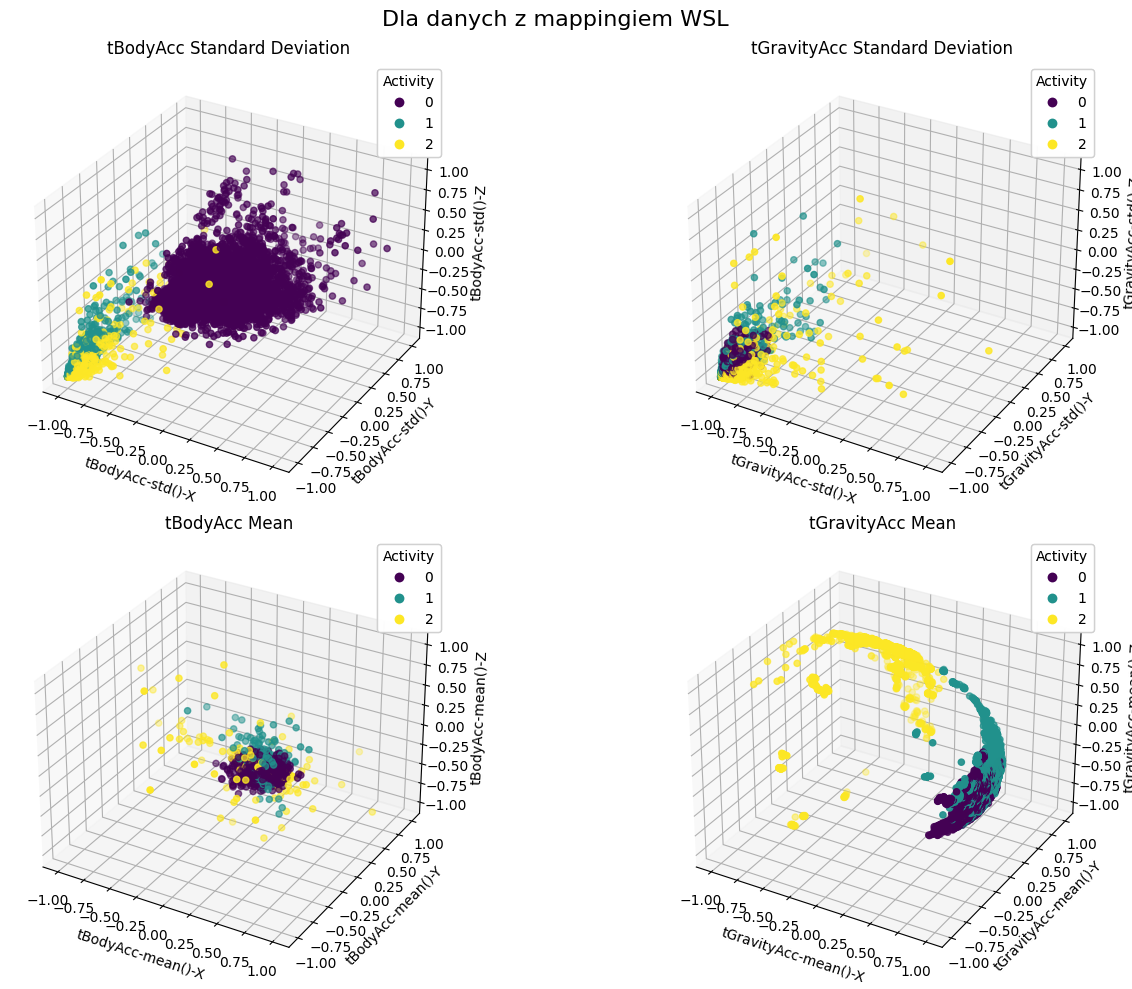

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221, projection='3d')
scatter1 = ax1.scatter(dane_wsl['tBodyAcc-std()-X'], dane_wsl['tBodyAcc-std()-Y'], dane_wsl['tBodyAcc-std()-Z'], c=dane_wsl['Activity'])
legend1 = ax1.legend(*scatter1.legend_elements(), title="Activity")
ax1.add_artist(legend1)
ax1.set_xlabel('tBodyAcc-std()-X')
ax1.set_ylabel('tBodyAcc-std()-Y')
ax1.set_zlabel('tBodyAcc-std()-Z')
ax1.set_title('tBodyAcc Standard Deviation')

ax2 = fig.add_subplot(222, projection='3d')
scatter2 = ax2.scatter(dane_wsl['tGravityAcc-std()-X'], dane_wsl['tGravityAcc-std()-Y'], dane_wsl['tGravityAcc-std()-Z'], c=dane_wsl['Activity'])
legend2 = ax2.legend(*scatter2.legend_elements(), title="Activity")
ax2.add_artist(legend2)
ax2.set_xlabel('tGravityAcc-std()-X')
ax2.set_ylabel('tGravityAcc-std()-Y')
ax2.set_zlabel('tGravityAcc-std()-Z')
ax2.set_title('tGravityAcc Standard Deviation')

ax3 = fig.add_subplot(223, projection='3d')
scatter3 = ax3.scatter(dane_wsl['tBodyAcc-mean()-X'], dane_wsl['tBodyAcc-mean()-Y'], dane_wsl['tBodyAcc-mean()-Z'], c=dane_wsl['Activity'])
legend3 = ax3.legend(*scatter3.legend_elements(), title="Activity")
ax3.add_artist(legend3)
ax3.set_xlabel('tBodyAcc-mean()-X')
ax3.set_ylabel('tBodyAcc-mean()-Y')
ax3.set_zlabel('tBodyAcc-mean()-Z')
ax3.set_title('tBodyAcc Mean')

ax4 = fig.add_subplot(224, projection='3d')
scatter4 = ax4.scatter(dane_wsl['tGravityAcc-mean()-X'], dane_wsl['tGravityAcc-mean()-Y'], dane_wsl['tGravityAcc-mean()-Z'], c=dane_wsl['Activity'])
legend4 = ax4.legend(*scatter4.legend_elements(), title="Activity")
ax4.add_artist(legend4)
ax4.set_xlabel('tGravityAcc-mean()-X')
ax4.set_ylabel('tGravityAcc-mean()-Y')
ax4.set_zlabel('tGravityAcc-mean()-Z')
ax4.set_title('tGravityAcc Mean')

fig.suptitle('Dla danych z mappingiem WSL', fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
def _KMeans(X, n_clusters):
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    return X, kmeans

## Macierz korelacji

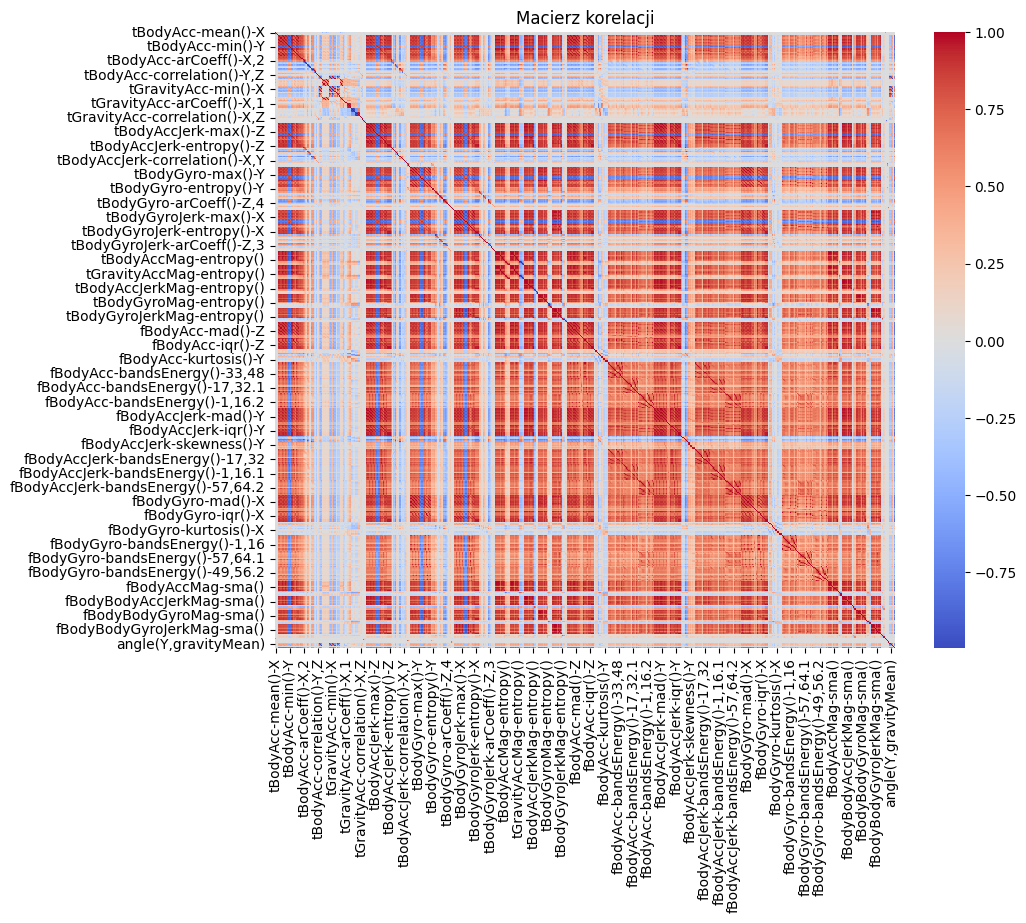

In [ ]:
correlation_matrix = dane.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

Ciężko cokolwiek wyczytać oprócz faktu, że dane przydałoby się znacząco zmniejszyć, ponieważ występuje dużo bardzo silnie korelujących powierzchni co sztucznie powiększa zbiór.

# KM2 - redukcja wymiarów i wstępne modelowanie

## Redukcja wymiarów

1. Usuwanie zmiennych skorelowanych na poziomie 0.9 lub więcej

In [ ]:
threshold = 0.9

abs_corr_matrix = correlation_matrix.abs()

high_corr_var = np.where(abs_corr_matrix > threshold)


to_drop = set()

for i in range(len(high_corr_var[0])):
    if high_corr_var[0][i] != high_corr_var[1][i]:
        col1 = correlation_matrix.columns[high_corr_var[0][i]]
        col2 = correlation_matrix.columns[high_corr_var[1][i]]
        to_drop.add(col2)

df_reduced = dane.drop(columns=to_drop)

high_corr_var

(array([  0,   1,   2, ..., 560, 561, 562]),
 array([  0,   1,   2, ..., 560, 561, 562]))

In [ ]:
correlation_matrix
abs_corr_matrix

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
tBodyAcc-mean()-X              1.000000           0.128037           0.230302   
tBodyAcc-mean()-Y              0.128037           1.000000           0.029882   
tBodyAcc-mean()-Z              0.230302           0.029882           1.000000   
tBodyAcc-std()-X               0.004590           0.046352           0.024185   
tBodyAcc-std()-Y               0.016785           0.046996           0.023745   
...                                 ...                ...                ...   
angle(X,gravityMean)           0.041021           0.007513           0.003215   
angle(Y,gravityMean)           0.034053           0.005616           0.012986   
angle(Z,gravityMean)           0.030656           0.016233           0.028406   
subject                        0.020345           0.001577           0.001981   
Activity                       0.009163           0.063079           0.061197   

                      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
tBodyAcc-mean()-X             0.004590          0.016785          0.036071   
tBodyAcc-mean()-Y             0.046352          0.046996          0.054153   
tBodyAcc-mean()-Z             0.024185          0.023745          0.015632   
tBodyAcc-std()-X              1.000000          0.922525          0.861910   
tBodyAcc-std()-Y              0.922525          1.000000          0.888259   
...                                ...               ...               ...   
angle(X,gravityMean)          0.374104          0.381391          0.353271   
angle(Y,gravityMean)          0.449425          0.506106          0.459092   
angle(Z,gravityMean)          0.393063          0.425511          0.483424   
subject                       0.061397          0.094486          0.036750   
Activity                      0.816037          0.820702          0.805907   

                      tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
tBodyAcc-mean()-X             0.010303          0.017488          0.038805   
tBodyAcc-mean()-Y             0.045247          0.047673          0.055524   
tBodyAcc-mean()-Z             0.022872          0.022966          0.009577   
tBodyAcc-std()-X              0.998662          0.916087          0.856497   
tBodyAcc-std()-Y              0.918561          0.997510          0.887052   
...                                ...               ...               ...   
angle(X,gravityMean)          0.371168          0.378013          0.355836   
angle(Y,gravityMean)          0.444926          0.507947          0.460345   
angle(Z,gravityMean)          0.389481          0.424479          0.480032   
subject                       0.059112          0.094315          0.042434   
Activity                      0.806817          0.821432          0.807288   

                      tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
tBodyAcc-mean()-X             0.046943  ...                         0.002255   
tBodyAcc-mean()-Y             0.039445  ...                         0.002842   
tBodyAcc-mean()-Z             0.040218  ...                         0.023122   
tBodyAcc-std()-X              0.981226  ...                         0.135171   
tBodyAcc-std()-Y              0.911137  ...                         0.191164   
...                                ...  ...                              ...   
angle(X,gravityMean)          0.384244  ...                         0.081971   
angle(Y,gravityMean)          0.458832  ...                         0.078010   
angle(Z,gravityMean)          0.402873  ...                         0.054008   
subject                       0.058773  ...                         0.044378   
Activity                      0.822154  ...                         0.065733   

                      angle(tBodyAccMean,gravity)  \
tBodyAcc-mean()-X                        0.552989   
tBodyAcc-mean()-Y                        0.077750   
tBodyAcc-mean()-Z                        0.055020   
tB

In [ ]:
high_corr_var[0][:50]
high_corr_var[1][:50]


array([  0,   1,   2,   3,   4,   6,   7,   9,  12,  15,  16,  19,  83,
        84,  86,  87,  89,  92,  95,  96,  99, 100, 102, 103, 104, 135,
       165, 168, 175, 181, 200, 201, 202, 203, 205, 206, 207, 213, 214,
       215, 216, 218, 219, 220, 226, 227, 228, 229, 231, 233])

In [ ]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10299 entries, 0 to 7351
Columns: 134 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(132), int64(2)
memory usage: 10.6 MB


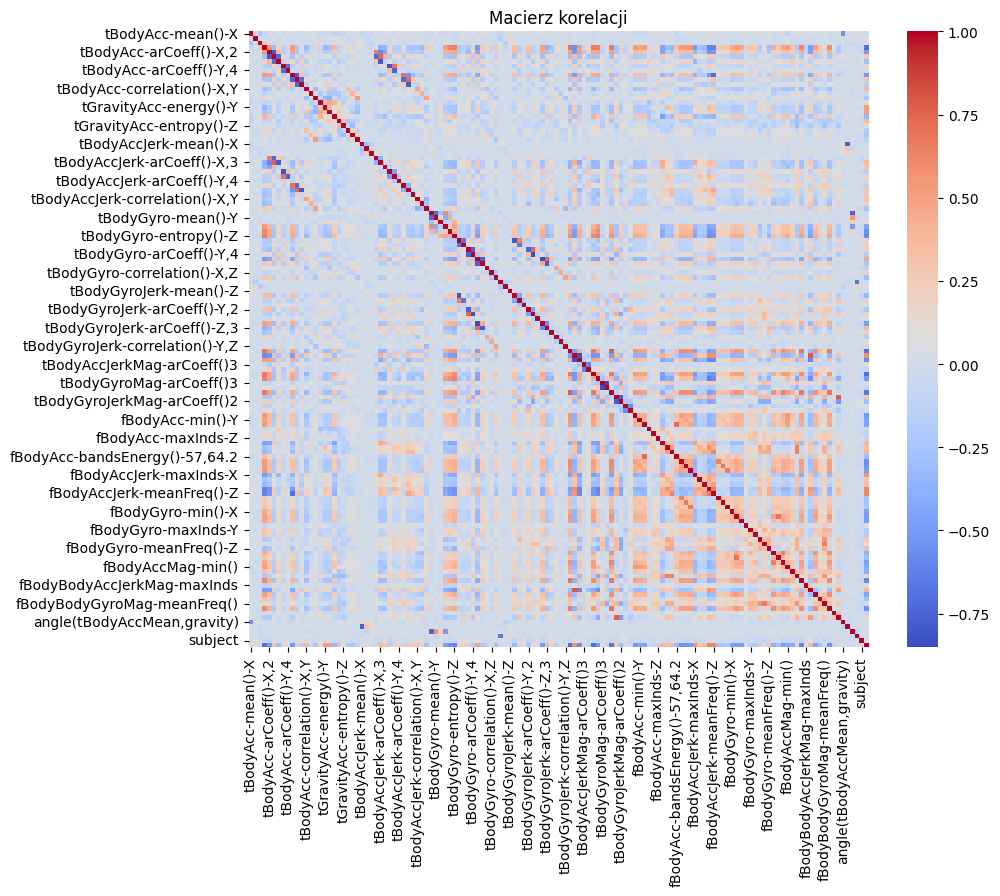

In [ ]:
correlation_matrix1 = df_reduced.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

2. usuwanie zmiennych na poziomie korelacji 0.75 lub wyżej

In [ ]:
threshold = 0.75

abs_corr_matrix = correlation_matrix.abs()

high_corr_var = np.where(abs_corr_matrix > threshold)


to_drop = set()

for i in range(len(high_corr_var[0])):
    if high_corr_var[0][i] != high_corr_var[1][i]:
        col1 = correlation_matrix.columns[high_corr_var[0][i]]
        col2 = correlation_matrix.columns[high_corr_var[1][i]]
        to_drop.add(col2)

df_reduced2 = dane.drop(columns=to_drop)

high_corr_var

(array([  0,   1,   2, ..., 562, 562, 562]),
 array([  0,   1,   2, ..., 536, 549, 562]))

In [ ]:
df_reduced2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10299 entries, 0 to 7351
Data columns (total 81 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tBodyAcc-mean()-X                     10299 non-null  float64
 1   tBodyAcc-mean()-Y                     10299 non-null  float64
 2   tBodyAcc-mean()-Z                     10299 non-null  float64
 3   tBodyAcc-arCoeff()-Y,4                10299 non-null  float64
 4   tBodyAcc-correlation()-X,Y            10299 non-null  float64
 5   tBodyAcc-correlation()-X,Z            10299 non-null  float64
 6   tBodyAcc-correlation()-Y,Z            10299 non-null  float64
 7   tGravityAcc-sma()                     10299 non-null  float64
 8   tGravityAcc-entropy()-X               10299 non-null  float64
 9   tGravityAcc-entropy()-Y               10299 non-null  float64
 10  tGravityAcc-entropy()-Z               10299 non-null  float64
 11  tGravityAcc-correlati

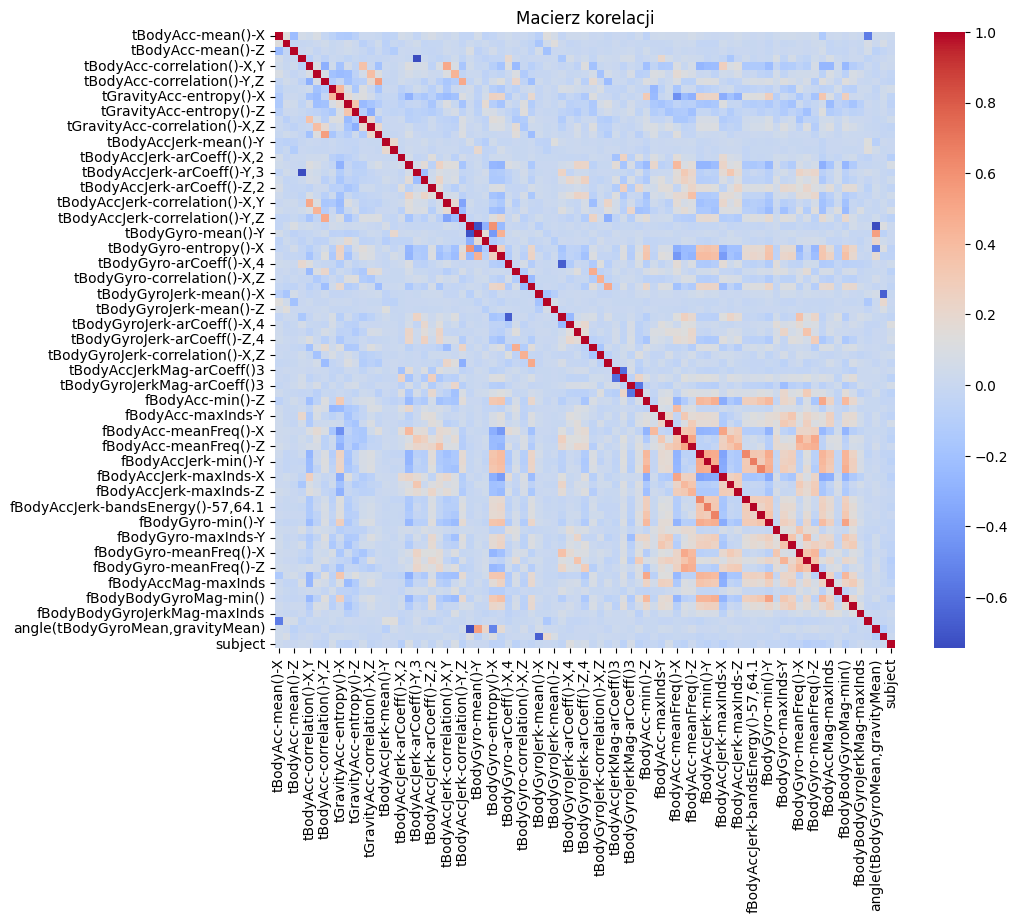

In [ ]:
correlation_matrix2 = df_reduced2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

In [ ]:
df_reduced2 = df_reduced2.drop(columns=['subject'])

## Analiza głównych składowych


Na mniejszej już tabelce przeprowadzimy analizę głównych składowych w celu dalszego jej zmiejszenia.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
df_reduced3 = pca.fit_transform(df_reduced2)

In [ ]:
df_reduced3

array([[-0.78810451,  1.49382078,  0.56551697, -0.90939267, -0.2226302 ],
       [-0.66856868,  0.81042513,  0.08500875, -0.77674645, -0.53908481],
       [-0.2408864 , -0.55504636, -0.61096698, -0.7247159 , -1.04251799],
       ...,
       [ 0.34658335,  0.62580917, -0.00765542,  0.94890371, -0.60939812],
       [-0.07620237,  0.74520138, -0.40386234,  1.26018907, -0.76520586],
       [ 0.41571012,  0.36752331,  0.50341932,  0.36318928, -0.39180914]])

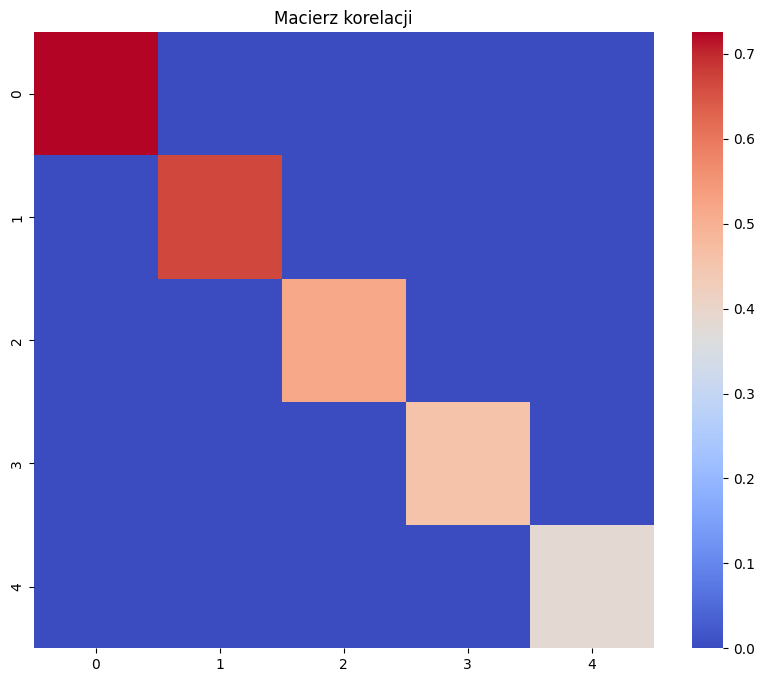

In [ ]:
correlation_matrix3 = np.cov(df_reduced3, rowvar=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

Sprawdzamy istotność każdej ze składowych



In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix3)
total_variance = sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance * 100

for i, explained_variance in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {explained_variance:.2f}%")

PC1: 26.35%
PC2: 24.27%
PC3: 13.91%
PC4: 18.84%
PC5: 16.63%


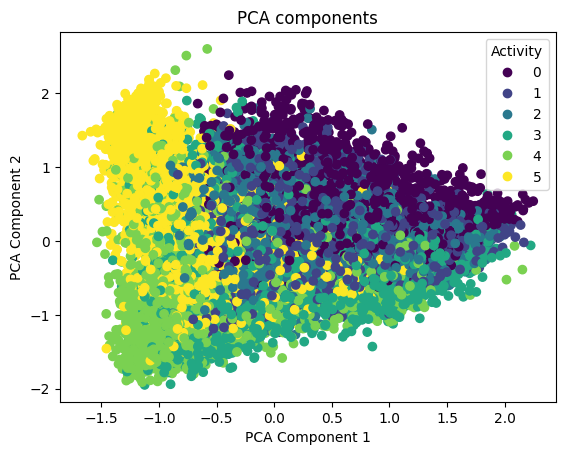

In [ ]:
scatter = plt.scatter(df_reduced3[:, 0], df_reduced3[:, 1], c=dane['Activity'])
legend = plt.legend(*scatter.legend_elements(), title="Activity")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA components')
plt.show()

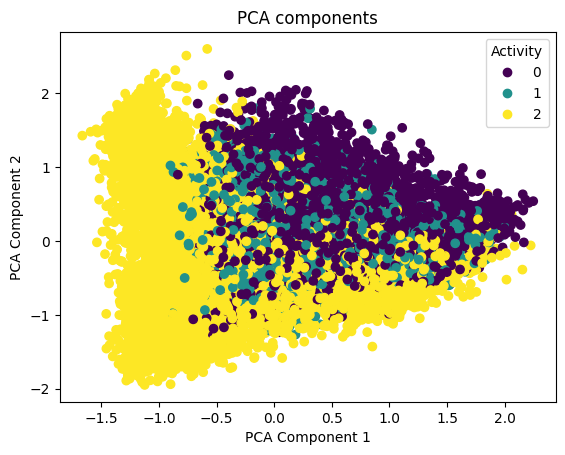

In [ ]:
scatter = plt.scatter(df_reduced3[:, 0], df_reduced3[:, 1], c=dane_vhs['Activity'])
legend = plt.legend(*scatter.legend_elements(), title="Activity")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA components')
plt.show()

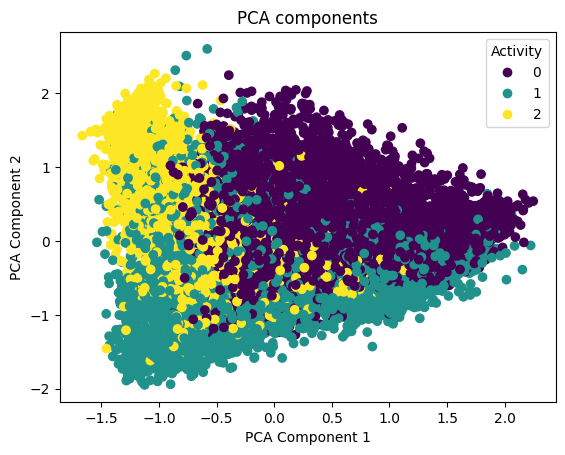

In [ ]:
scatter = plt.scatter(df_reduced3[:, 0], df_reduced3[:, 1], c=dane_wsl['Activity'])
legend = plt.legend(*scatter.legend_elements(), title="Activity")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA components')
plt.show()

## Klasteryzacja

Tutaj zdecydowaliśmy, że będziemy oprócz powyżej tabelki df_reduced3 stworzymy jeszcze druga tabelkę i będziemy tworzyć modele jednocześnie na nich dwóch. Wynika to z tego, że nie jesteśmy pewni czy PCA zadziała na tyle dobrze, żeby jedynie w 5 kolumnach zawrzeć wszystkie dane potrzebne do poprawnego rozdziału Aktywności przez modele. Druga tabelka będzie również stworzona po zastosowaniu PCA na tabelce 'dane' co zweryfikuje poprawność naszej własnej redukcji wymiarów. Zatem nasze tabelki na których będziemy tworzyć modele to:

*   df_PCA_5 - wyżej używana tabelka df_reduced3 (zmniejszenie df_reduced2 za pomocą PCA do 5 kolumn)
*   df_PCA_10 - zastosowanie PCA do zmniejszenia tabelki dane do 10 kolumn

Zatem przy każdym testowanym modelu, dla obydwu z powyższych tabel będziemy mierzyć jak poradził sobie model w przyporządkowywaniu klastrów do każdego z 3 różnych typów rozdzielania aktywności.

Przykład:

KMeans:
1.   działamy na tabelce df_PCA_5
  *   klastrowanie na 6 klastrów i przyporządkowanie do grup aktywności z tabeli dane
  *   klastrowanie na 3 klasty i przyporządkowanie do grup aktywności z tabeli dane_vhs
  *   klastrowanie na 3 klasty i przyporządkowanie do grup aktywności z tabeli dane_wsl
2.   działamy na tabelce df_PCA_10
  *   klastrowanie na 6 klastrów i przyporządkowanie do grup aktywności z tabeli dane
  *   klastrowanie na 3 klasty i przyporządkowanie do grup aktywności z tabeli dane_vhs
  *   klastrowanie na 3 klasty i przyporządkowanie do grup aktywności z tabeli dane_wsl

Zatem dla każdego modelu otrzymamy 6 wyników. Wyniki będą mierzone przy pomocy  miary dopasowania między klastrami a aktywnością, co liczymy przy pomocy metryki ari_score. Docelowy model będzie modelem z najwyższą miarą dopasowania.








In [ ]:
df_PCA_5 = df_reduced3

pca = PCA(n_components=10)
df_PCA_10 = pca.fit_transform(dane)

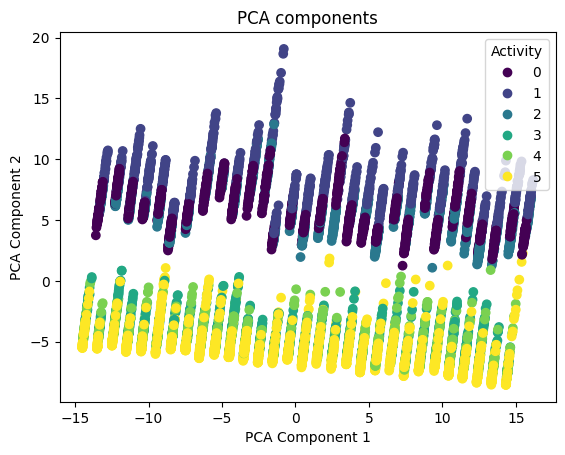

In [ ]:
scatter = plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=dane['Activity'])
legend = plt.legend(*scatter.legend_elements(), title="Activity")

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA components')
plt.show()

scatter plot wyglada zupelnie inaczej. Jeszcze ponizej dla innego rozdziału kolumny Activity

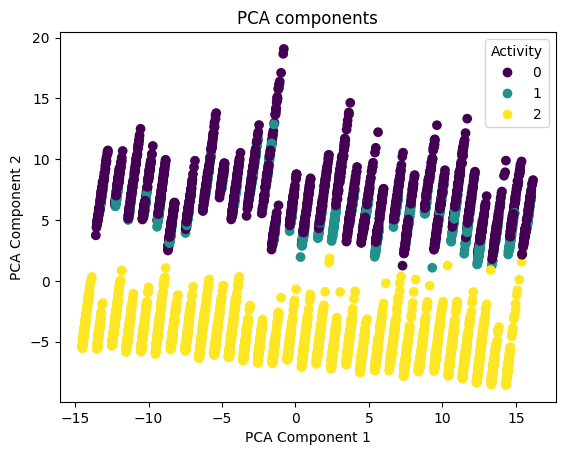

In [ ]:
scatter = plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=dane_vhs['Activity'])
legend = plt.legend(*scatter.legend_elements(), title="Activity")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA components')
plt.show()

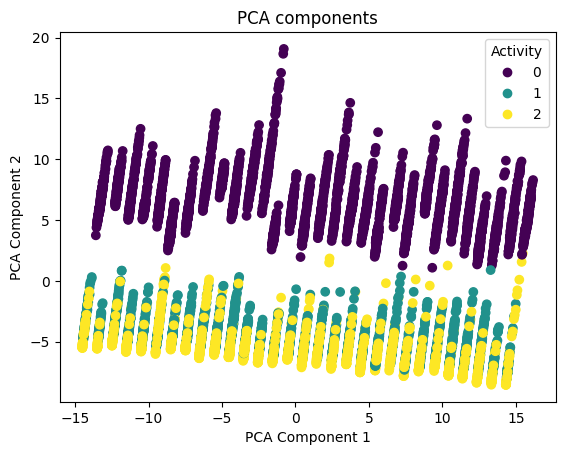

In [ ]:
scatter = plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=dane_wsl['Activity'])
legend = plt.legend(*scatter.legend_elements(), title="Activity")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA components')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score

def evaluate_clustering(true_labels, cluster_labels):
    ari_score = adjusted_rand_score(true_labels, cluster_labels)
    return ari_score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

### Metoda k-średnich

In [ ]:
def _KMeans(X, n_clusters):
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    return X, kmeans

### **df_PCA_5**

**dane**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Adjusted Rand Index: 0.22355245484424635


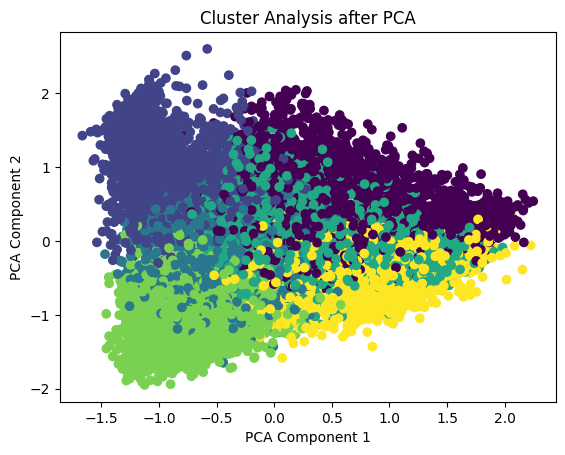

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_PCA_5)
labels = kmeans.labels_

ari_score = evaluate_clustering(dane['Activity'], labels)
print(f'KMeans Adjusted Rand Index: {ari_score}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Analysis after PCA')
plt.show()

**dane_vhs**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Adjusted Rand Index: 0.023521129901091828


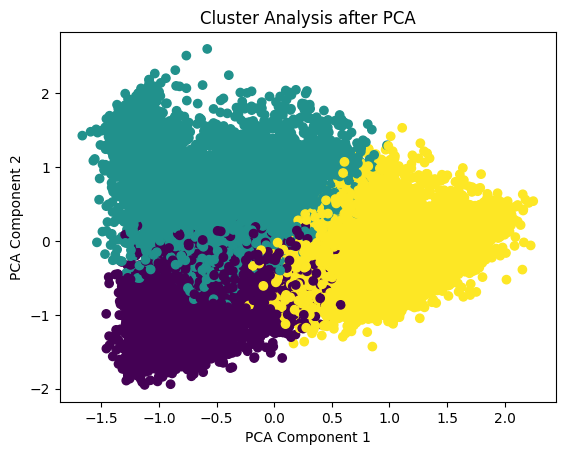

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_PCA_5)
labels = kmeans.labels_

ari_score = evaluate_clustering(dane_vhs['Activity'], labels)
print(f'KMeans Adjusted Rand Index: {ari_score}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Analysis after PCA')
plt.show()

**dane_wsl**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Adjusted Rand Index: 0.07039289338255154


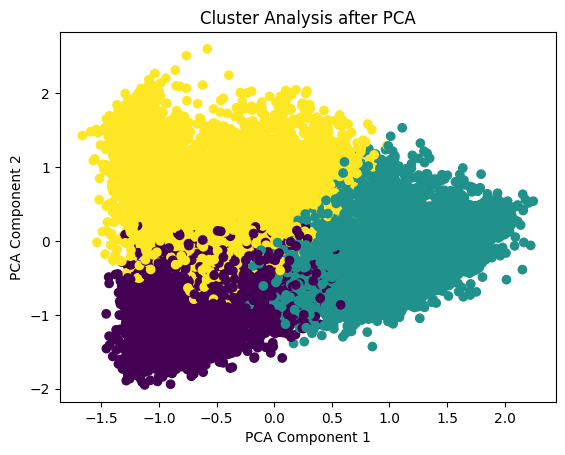

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_PCA_5)
labels = kmeans.labels_

ari_score = evaluate_clustering(dane_wsl['Activity'], labels)
print(f'KMeans Adjusted Rand Index: {ari_score}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Analysis after PCA')
plt.show()

### **df_PCA_10**

**dane**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Adjusted Rand Index: 0.19847921486652756


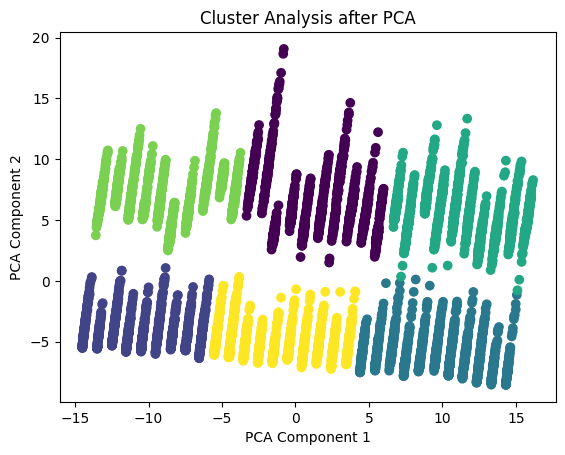

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_PCA_10)
labels = kmeans.labels_

ari_score = evaluate_clustering(dane['Activity'], labels)
print(f'KMeans Adjusted Rand Index: {ari_score}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Analysis after PCA')
plt.show()

**dane_vhs**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Adjusted Rand Index: 0.32145282655425517


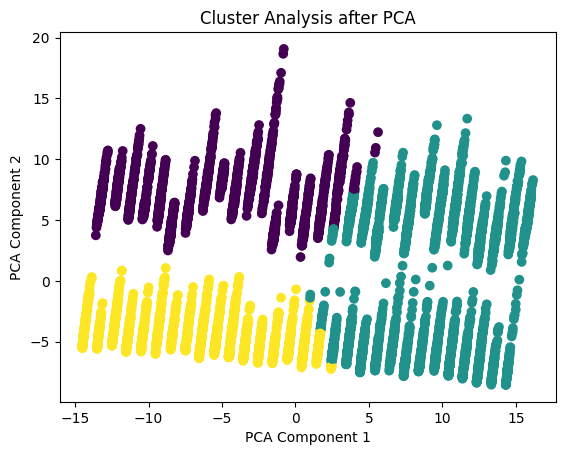

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_PCA_10)
labels = kmeans.labels_

ari_score = evaluate_clustering(dane_vhs['Activity'], labels)
print(f'KMeans Adjusted Rand Index: {ari_score}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Analysis after PCA')
plt.show()

**dane_wsl**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Adjusted Rand Index: 0.28649298198531803


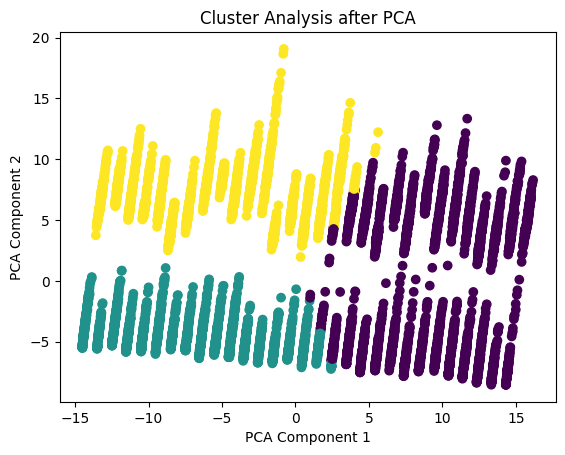

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_PCA_10)
labels = kmeans.labels_

ari_score = evaluate_clustering(dane_wsl['Activity'], labels)
print(f'KMeans Adjusted Rand Index: {ari_score}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Analysis after PCA')
plt.show()

### Mini-Batch

### **df_PCA_5**

**dane**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans Adjusted Rand Index: 0.21996600943889294


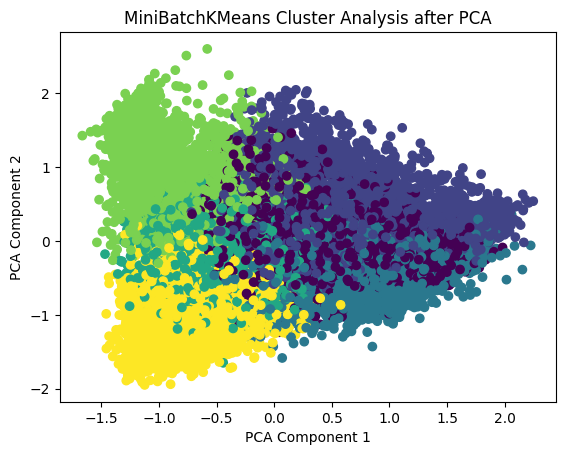

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=6)
minibatch_kmeans.fit(df_PCA_5)
labels_minibatch = minibatch_kmeans.labels_

ari_score_minibatch = evaluate_clustering(dane['Activity'], labels_minibatch)
print(f'MiniBatchKMeans Adjusted Rand Index: {ari_score_minibatch}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_minibatch)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MiniBatchKMeans Cluster Analysis after PCA')
plt.show()

**dane_vhs**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans Adjusted Rand Index: 0.050579763143258745


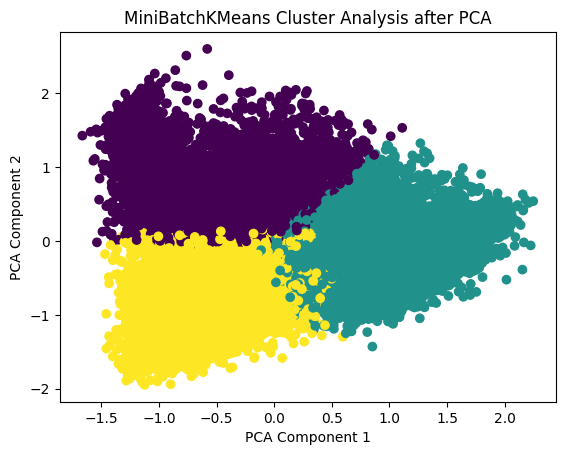

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=3)
minibatch_kmeans.fit(df_PCA_5)
labels_minibatch = minibatch_kmeans.labels_

ari_score_minibatch = evaluate_clustering(dane_vhs['Activity'], labels_minibatch)
print(f'MiniBatchKMeans Adjusted Rand Index: {ari_score_minibatch}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_minibatch)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MiniBatchKMeans Cluster Analysis after PCA')
plt.show()

**dane_wsl**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans Adjusted Rand Index: 0.36939100019096444


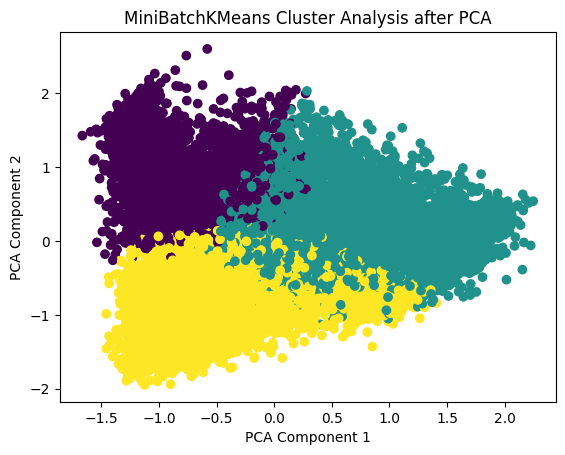

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=3)
minibatch_kmeans.fit(df_PCA_5)
labels_minibatch = minibatch_kmeans.labels_

ari_score_minibatch = evaluate_clustering(dane_wsl['Activity'], labels_minibatch)
print(f'MiniBatchKMeans Adjusted Rand Index: {ari_score_minibatch}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_minibatch)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MiniBatchKMeans Cluster Analysis after PCA')
plt.show()

### **df_PCA_10**

**dane**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans Adjusted Rand Index: 0.2190804117208045


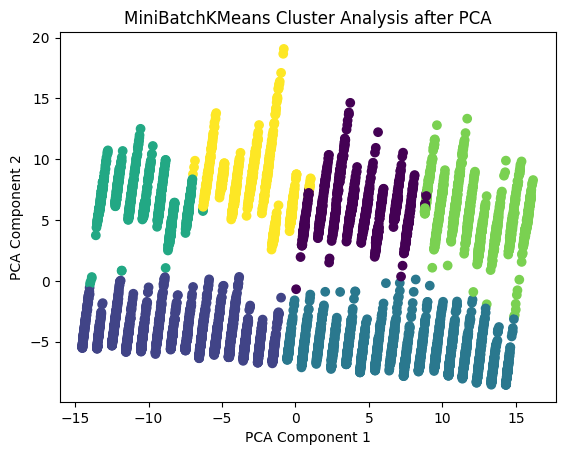

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=6)
minibatch_kmeans.fit(df_PCA_10)
labels_minibatch = minibatch_kmeans.labels_

ari_score_minibatch = evaluate_clustering(dane['Activity'], labels_minibatch)
print(f'MiniBatchKMeans Adjusted Rand Index: {ari_score_minibatch}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_minibatch)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MiniBatchKMeans Cluster Analysis after PCA')
plt.show()

dane_vhs

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans Adjusted Rand Index: 0.24440948257610645


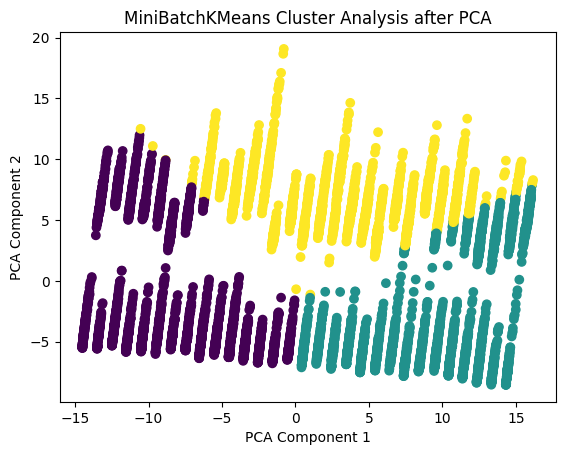

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=3)
minibatch_kmeans.fit(df_PCA_10)
labels_minibatch = minibatch_kmeans.labels_

ari_score_minibatch = evaluate_clustering(dane_vhs['Activity'], labels_minibatch)
print(f'MiniBatchKMeans Adjusted Rand Index: {ari_score_minibatch}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_minibatch)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MiniBatchKMeans Cluster Analysis after PCA')
plt.show()

**dane_wsl**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans Adjusted Rand Index: 0.30150987123783596


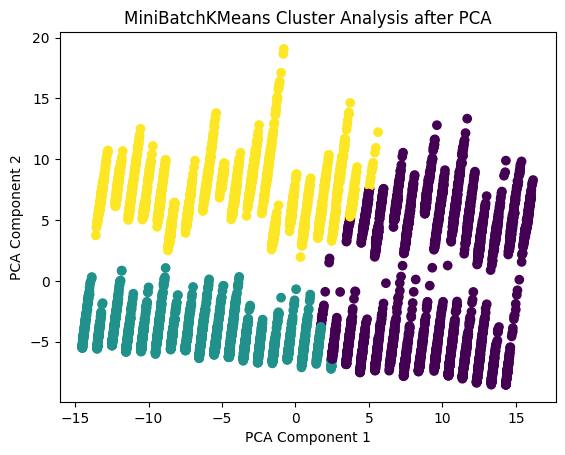

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=3)
minibatch_kmeans.fit(df_PCA_10)
labels_minibatch = minibatch_kmeans.labels_

ari_score_minibatch = evaluate_clustering(dane_wsl['Activity'], labels_minibatch)
print(f'MiniBatchKMeans Adjusted Rand Index: {ari_score_minibatch}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_minibatch)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MiniBatchKMeans Cluster Analysis after PCA')
plt.show()

### DBSCAN

### **df_PCA_5**

**dane**

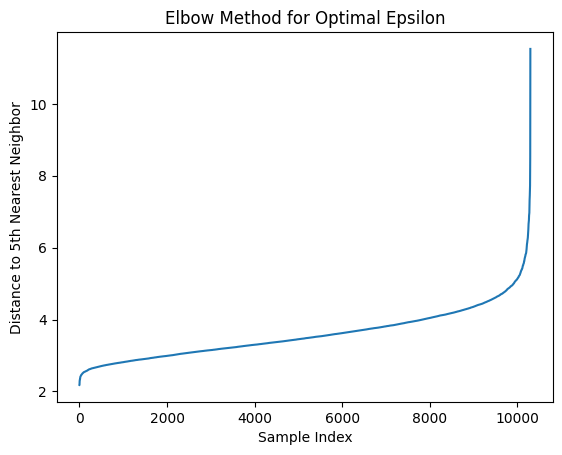

In [ ]:
from sklearn.neighbors import NearestNeighbors

X = dane.drop(columns=['Activity', 'subject']).values

minPts = 6

neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:, minPts - 1])

plt.plot(distances)
plt.xlabel('Sample Index')
plt.ylabel(f'Distance to {minPts-1}th Nearest Neighbor')
plt.title('Elbow Method for Optimal Epsilon')
plt.show()

DBSCAN Adjusted Rand Index: 0.0


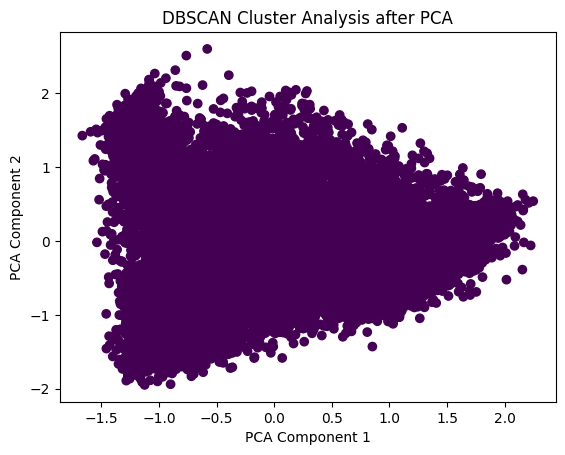

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5.5, min_samples=6)
labels_dbscan = dbscan.fit_predict(df_PCA_5)

ari_score_dbscan = evaluate_clustering(dane['Activity'], labels_dbscan)
print(f'DBSCAN Adjusted Rand Index: {ari_score_dbscan}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_dbscan)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Cluster Analysis after PCA')
plt.show()

nie działa, ale może dla 3 klastrów?

**dane_vhs**

DBSCAN Adjusted Rand Index: 0.0


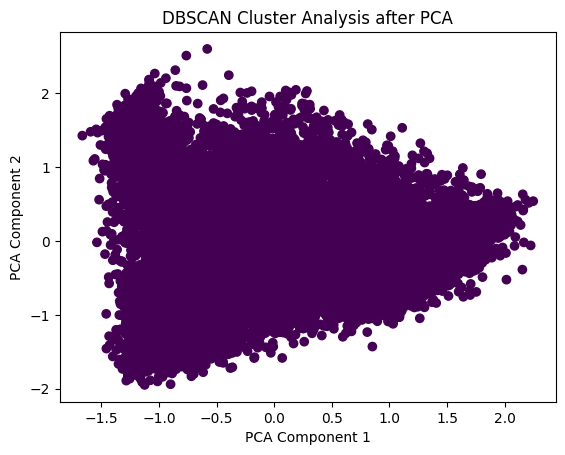

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5.5, min_samples=3)
labels_dbscan = dbscan.fit_predict(df_PCA_5)

ari_score_dbscan = evaluate_clustering(dane_vhs['Activity'], labels_dbscan)
print(f'DBSCAN Adjusted Rand Index: {ari_score_dbscan}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_dbscan)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Cluster Analysis after PCA')
plt.show()

kompletnie nie działa, idziemy dalej

### GMM

### **df_PCA_5**

**dane**

GMM Adjusted Rand Index: 0.2280257636912258


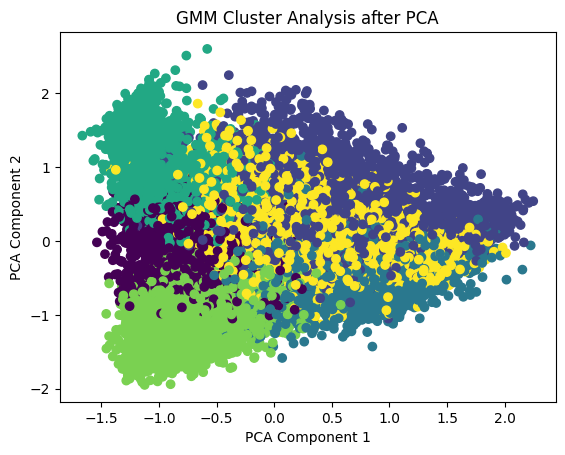

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)
labels_gmm = gmm.fit_predict(df_PCA_5)

ari_score_gmm = evaluate_clustering(dane['Activity'], labels_gmm)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_gmm)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Cluster Analysis after PCA')
plt.show()

**dane_vhs**

GMM Adjusted Rand Index: 0.01592820426962423


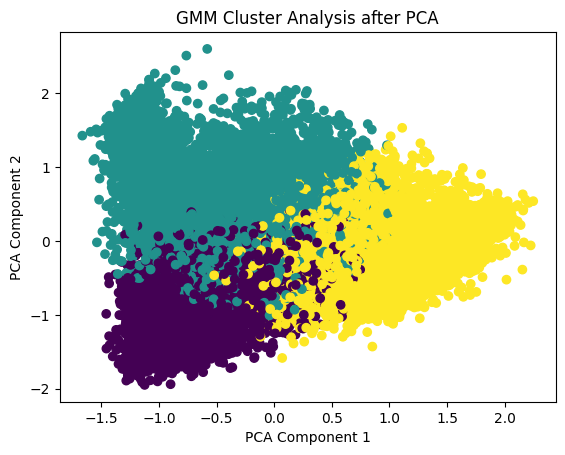

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
labels_gmm = gmm.fit_predict(df_PCA_5)

ari_score_gmm = evaluate_clustering(dane_vhs['Activity'], labels_gmm)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_gmm)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Cluster Analysis after PCA')
plt.show()

**dane_wsl**

GMM Adjusted Rand Index: 0.19120488711739994


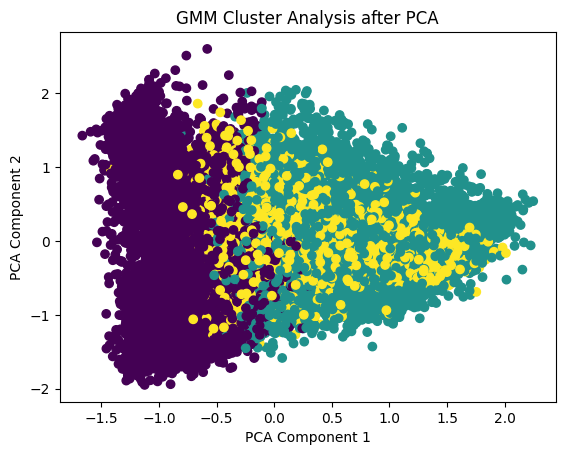

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
labels_gmm = gmm.fit_predict(df_PCA_5)

ari_score_gmm = evaluate_clustering(dane_wsl['Activity'], labels_gmm)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_gmm)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Cluster Analysis after PCA')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(dane_wsl['Activity'], labels_gmm)

array([[ 501, 1990, 2181],
       [2098, 1529,   56],
       [1671,  269,    4]])

### **df_PCA_10**

**dane**

GMM Adjusted Rand Index: 0.38410484839824127


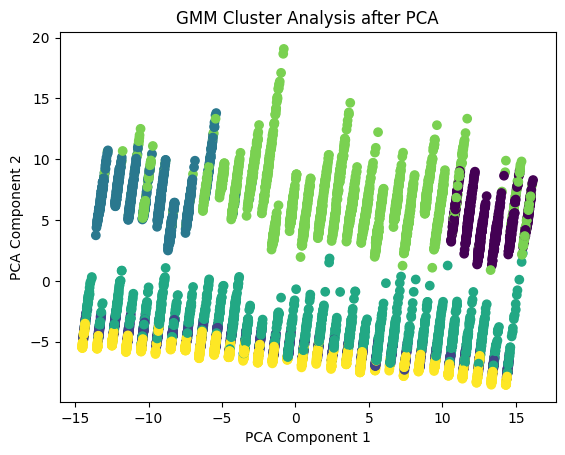

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)
labels_gmm = gmm.fit_predict(df_PCA_10)

ari_score_gmm = evaluate_clustering(dane['Activity'], labels_gmm)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_gmm)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Cluster Analysis after PCA')
plt.show()

**dane_vhs**

GMM Adjusted Rand Index: 0.5478699240597253


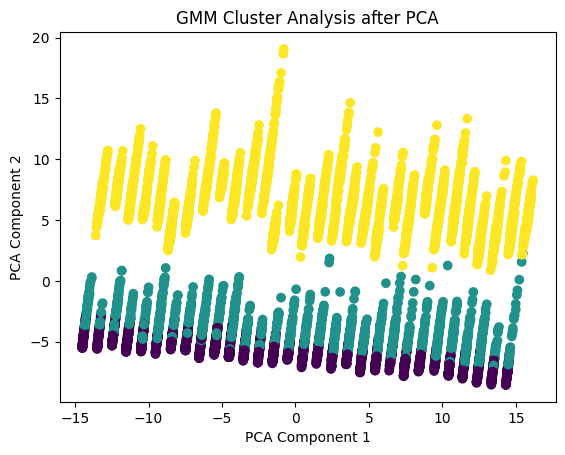

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
labels_gmm = gmm.fit_predict(df_PCA_10)

ari_score_gmm = evaluate_clustering(dane_vhs['Activity'], labels_gmm)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_gmm)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Cluster Analysis after PCA')
plt.show()

**dane_wsl**

GMM Adjusted Rand Index: 0.6856473485487684


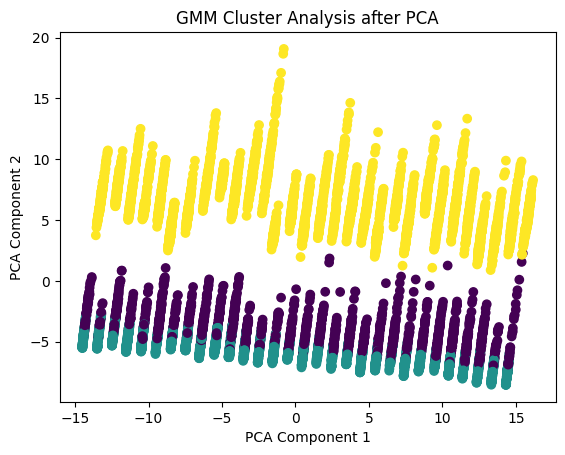

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
labels_gmm = gmm.fit_predict(df_PCA_10)

ari_score_gmm = evaluate_clustering(dane_wsl['Activity'], labels_gmm)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_gmm)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Cluster Analysis after PCA')
plt.show()

### Spectral clustering

### **df_PCA_5**

**dane**

GMM Adjusted Rand Index: 0.2421728370845157


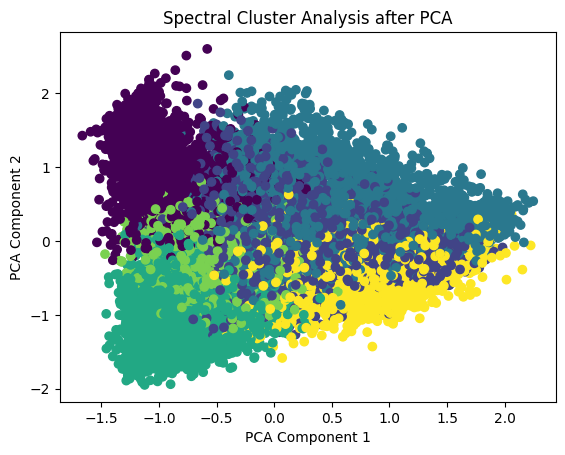

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

spectral = SpectralClustering(n_clusters=6, affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(df_PCA_5)

ari_score_gmm = evaluate_clustering(dane['Activity'], labels_spectral)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_spectral)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Spectral Cluster Analysis after PCA')
plt.show()

**dane_vhs**

GMM Adjusted Rand Index: 0.012634754784089233


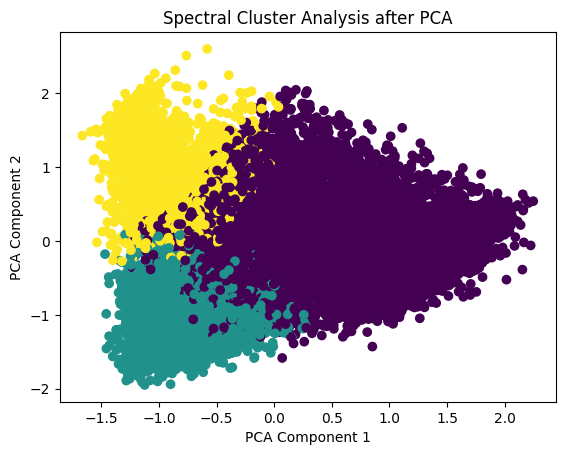

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(df_PCA_5)

ari_score_gmm = evaluate_clustering(dane_vhs['Activity'], labels_spectral)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_spectral)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Spectral Cluster Analysis after PCA')
plt.show()

**dane_wsl**

GMM Adjusted Rand Index: 0.2829268879046399


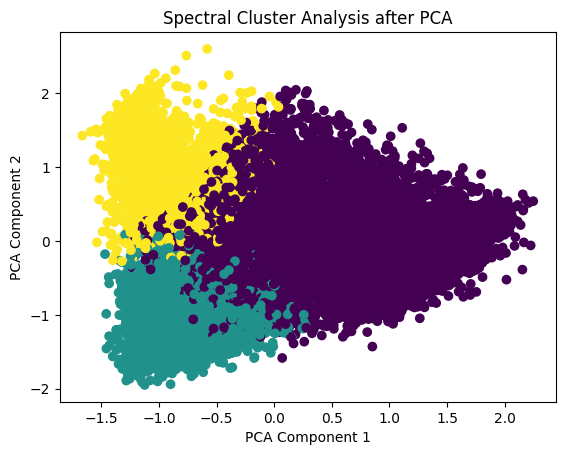

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(df_PCA_5)

ari_score_gmm = evaluate_clustering(dane_wsl['Activity'], labels_spectral)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_5[:, 0], df_PCA_5[:, 1], c=labels_spectral)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Spectral Cluster Analysis after PCA')
plt.show()

### **df_PCA_10**

**dane**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


GMM Adjusted Rand Index: 0.17644448891065104


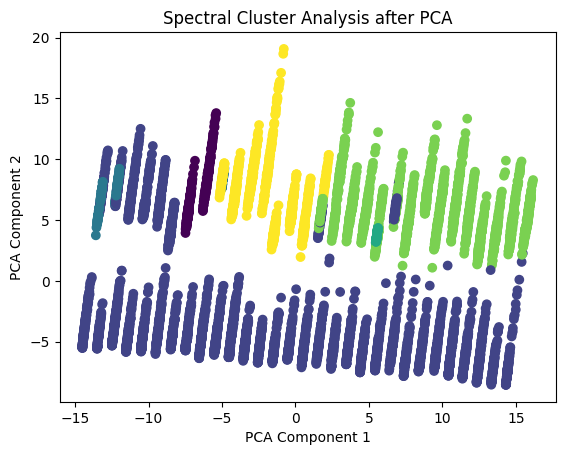

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

spectral = SpectralClustering(n_clusters=6, affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(df_PCA_10)

ari_score_gmm = evaluate_clustering(dane['Activity'], labels_spectral)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_spectral)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Spectral Cluster Analysis after PCA')
plt.show()

**dane_vhs**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


GMM Adjusted Rand Index: 0.2732306094533768


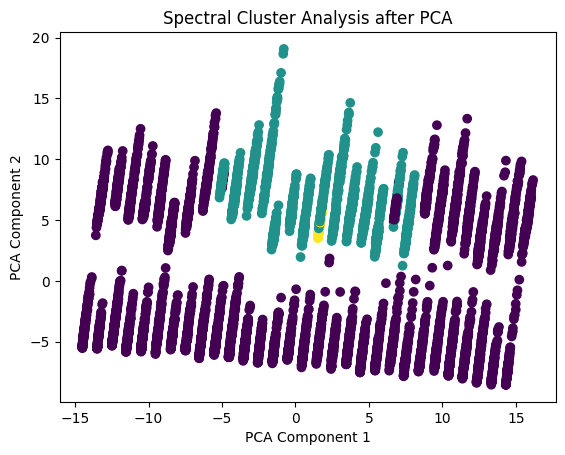

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(df_PCA_10)

ari_score_gmm = evaluate_clustering(dane_vhs['Activity'], labels_spectral)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_spectral)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Spectral Cluster Analysis after PCA')
plt.show()

**dane_wsl**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


GMM Adjusted Rand Index: 0.058978048072208446


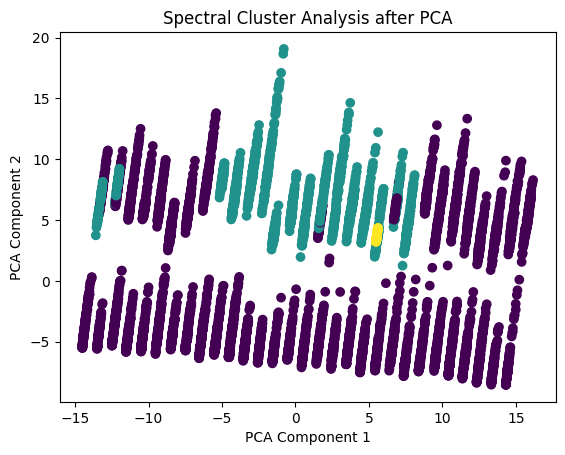

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(df_PCA_10)

ari_score_gmm = evaluate_clustering(dane_wsl['Activity'], labels_spectral)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_spectral)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Spectral Cluster Analysis after PCA')
plt.show()

In [ ]:
labels_spectral

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
def confusion_matrix(true_labels, cluster_labels):
    confusion_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    return confusion_matrix

# Model finalny

najlepszy stały wynik był osiągany dla model GMM działającym na tabeli df_PCA_10 gdzie klastry były przyporządkowywane do grup aktywności z tabeli dane_wsl, czyli tej, która dzialiła aktywności na chodzenie, aktywności stacjonarne (bez lezenia) oraz lezenie

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
labels_gmm = gmm.fit_predict(df_PCA_10)

ari_score_gmm = evaluate_clustering(dane_wsl['Activity'], labels_gmm)
print(f'GMM Adjusted Rand Index: {ari_score_gmm}')

GMM Adjusted Rand Index: 0.6856149605286103


Porownanie klastrow wizualnie, gdzie 1 plot to rzeczywiste klastry

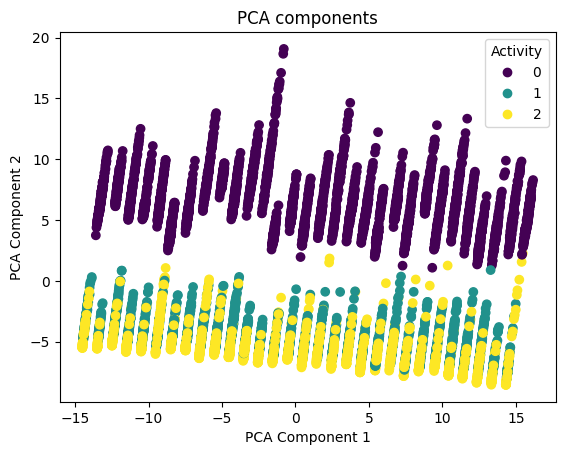

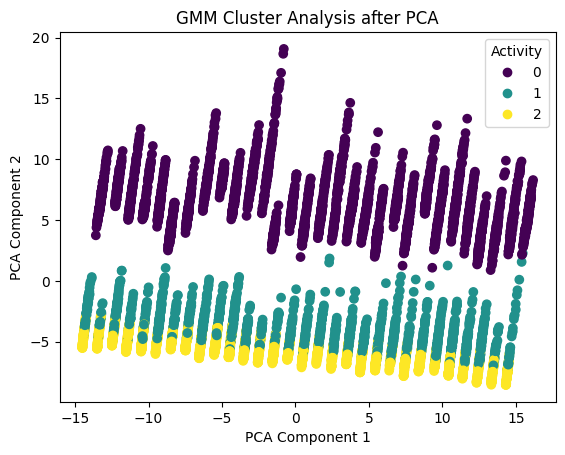

In [ ]:
plt.figure()
scatter = plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=dane_wsl['Activity'])
plt.legend(*scatter.legend_elements(), title="Activity")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA components')
plt.show()

plt.figure()
plt.scatter(df_PCA_10[:, 0], df_PCA_10[:, 1], c=labels_gmm)
plt.legend(*scatter.legend_elements(), title="Activity")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Cluster Analysis after PCA')
plt.show()

Zobaczmy jak wygląda macierz błędów:

In [ ]:
confusion_matrix(dane_wsl['Activity'], labels_gmm)

array([[4672,    0,    0],
       [   1, 1074, 2608],
       [   0,  511, 1433]])

Zatem klaster aktywności zawierający chodzenie jest przyporządkowany praktycznie bezbłednie.
Problem występuje w pozostałych klastrach, gdzie wiekszość aktywności stacjonarnych jest przyporządkowanych
prawidłowo, jednak tez większosc aktywnosci lezenia jest przyporzadkowanych blednie do 2 klastra.

### Nasz model przy takich danych wejsciowych moze więc słuzyć dobrze w aplikacjach mających na celu rozpoznawanie ruchu uzytkownika, np w celu liczenia kroków.